# How to recover the first TESS planet candidate with *Lightkurve*?

## Originally Written by Geert Barentsen
### Minor modifications: Chetan Chawla for Intro To Astro 2020 class


Data from the TESS mission are [available from the data archive at MAST](https://archive.stsci.edu/prepds/tess-data-alerts/). This tutorial demonstrates how the [Lightkurve Python package](http://lightkurve.keplerscience.org) can be used to read in these data and create your own TESS light curves with different aperture masks.

Below is a quick tutorial on how to get started using *Lightkurve* and TESS data. We'll use the nearby, bright target Pi Mensae (ID 261136679), around which the mission team recently discovered a short period planet candidate on a 6.27 day orbit. See the [pre-print paper by Huang et al (2018)](https://arxiv.org/abs/1809.05967) for more details.

TESS data is stored in a binary file format which is documented in the [TESS Science Data Products Description Document](https://archive.stsci.edu/missions/tess/doc/EXP-TESS-ARC-ICD-TM-0014.pdf). *Lightkurve* provides a `TessTargetPixelFile` class which allows you to interact with the data easily.



In [4]:
pip install lightkurve

     |████████████████████████████████| 2.1MB 3.2MB/s 
     |████████████████████████████████| 6.5MB 6.7MB/s 
     |████████████████████████████████| 256kB 41.9MB/s 
     |████████████████████████████████| 25.9MB 166kB/s 
     |████████████████████████████████| 2.7MB 39.8MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=a8aaab09254c07ac15622c5df4767da6d90d8c45086e1ec0226fb47e504a8439
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
  Created wheel for fbpca: filename=fbpca-1.0-cp36-none-any.whl size=11376 sha256=75acabc11c55385861ebafa3e74fa1607cec95e0b83855b9b71116ac779a781b
  Stored in directory: /root/.cache/pip/wheels/53/a2/dd/9b66cf53dbc58cec1e613d216689e5fa946d3e7805c30f60dc
  Created wheel for oktopus: filename=oktopus-0.1.2-cp36-none-any.whl size=12779 sha256=88f963a505a935f7d22d052c207a6a709e157e7043fff5c30d4f3d8ca48851b9
  Stored in directory: /root/.cache/pip/wheels/

In [ ]:
#!pip install tensorflow

In [1]:
import lightkurve as lk

Here we detect the Target Pixel File for Pi Mensae which is a nearby, bright target (ID 261136679), around which the mission team recently discovered a short period planet candidate on a 6.27 day orbit. See the pre-print paper by Huang et al (2018) for more details.

TESS data is stored in a binary file format which is documented in the TESS Science Data Products Description Document. Lightkurve provides a TessTargetPixelFile class which allows you to interact with the data easily.

The target pixel file for a TESS Object of Interest (TOI) is found by lightkurve.search_targetpixelfile() function

In [2]:
?lk.search_targetpixelfile

Searches the `public data archive at MAST <https://archive.stsci.edu>`_
for a Kepler or TESS `~lightkurve.targetpixelfile.TargetPixelFile`.

This function fetches a data table that lists the Target Pixel Files (TPFs)
that fall within a region of sky centered around the position of `target`
and within a cone of a given `radius`. If no value is provided for `radius`,
only a single target will be returned.

lk.search_targetpixelfile(target, radius=None, cadence='long', mission=('Kepler', 'K2', 'TESS'), quarter=None, month=None, campaign=None, sector=None, limit=None)



In [3]:
search_result = lk.search_targetpixelfile('Pi Mensae', mission='TESS', sector=1)

In [4]:
search_result

#,observation,target_name,productFilename,distance
0,TESS Sector 1,261136679,tess2018206045859-s0001-0000000261136679-0120-s_tp.fits,0.0


In [5]:
print(type(search_result))  ##It is a lightkurve's search.SearchResult type object

<class 'lightkurve.search.SearchResult'>


In [6]:
tpf = search_result.download(quality_bitmask='default')

In [7]:
tpf
#TICID is the TESS Input Catalog ID, which corresponds to the host star ID of the exoplanet file as detected by TESS

TessTargetPixelFile(TICID: 261136679)

`TessTargetPixelFile`'s have many helpful methods and attributes. For example, you can access basic meta data on the target easily:

In [8]:
tpf.mission

'TESS'

In [9]:
tpf.targetid  # TESS Input Catalog (TIC) Identifier

261136679

In [10]:
tpf.sector  # TESS Observation Sector

1

In [11]:
tpf.camera  # TESS Camera Number

4

In [12]:
tpf.ccd  # TESS CCD Number (Charged Coupled Device or the camera sensor)

2

We might want to plot the data, we can do this with the `plot()` method. You can add the keyword `aperture_mask` to plot an aperture on top of the image. In this case we've used the `pipeline_mask` which is stored in the original .fits file, but you can use any aperture you like.

/home/chetan/.local/lib/python3.6/site-packages/lightkurve/utils.py:459: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(cax, ax=ax, norm=norm, label=clabel)


<AxesSubplot:title={'center':'Target ID: 261136679, Cadence: 70445'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

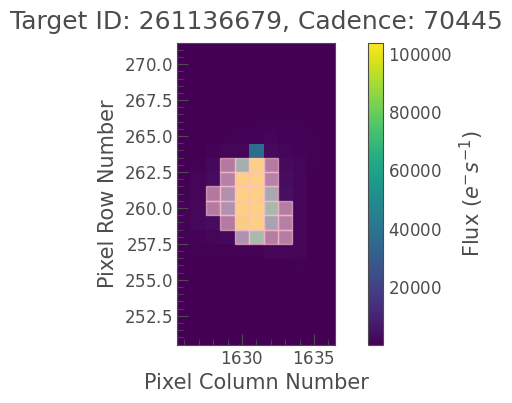

In [13]:
%matplotlib inline
tpf.plot(aperture_mask=tpf.pipeline_mask)

If you want to access the original fits file that generated the data you can use the `hdu` attribute of the tpf. This will return an `astropy.io.fits` object, for example

In [14]:
tpf.hdu

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fa713da4780>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fa713cf2438>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fa760de88d0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fa70e1de908>]

You can access each extension and the data inside it in the same way you'd use `astropy.io.fits`. If you want to access data held in the TPF, such as the time of the observations, you can do that easily by using

In [15]:
tpf.time

array([1325.29698328, 1325.29837215, 1325.29976102, ..., 1353.17431099,
       1353.17569985, 1353.17708871])

This returns the time in units of days counted since [Julian Day](https://en.wikipedia.org/wiki/Julian_day) 2457000.  

You can access the corresponding flux values using

In [16]:
tpf.flux

array([[[  -1.3825388,  -37.66533  ,  -91.830536 , ..., -108.04645  ,
         -103.54175  , -134.1816   ],
        [-135.68407  , -125.30367  , -112.52773  , ..., -113.03839  ,
         -122.92997  , -131.28302  ],
        [-147.63722  , -142.73625  , -134.99854  , ..., -101.330734 ,
         -114.31767  , -121.03055  ],
        ...,
        [-138.13503  , -137.8448   , -146.29425  , ...,  -77.273094 ,
         -105.22347  , -135.82652  ],
        [-142.20255  , -139.6766   , -147.65201  , ..., -118.81814  ,
         -129.52805  , -130.46175  ],
        [-133.71326  , -134.32669  , -148.82013  , ..., -127.16725  ,
          -90.90953  , -112.974434 ]],

       [[  -3.390986 ,  -47.140965 ,  -90.53796  , ..., -106.87563  ,
         -108.55464  , -136.6413   ],
        [-133.7175   , -125.38933  , -114.30842  , ..., -115.82087  ,
         -125.8608   , -132.87209  ],
        [-147.48918  , -142.87836  , -138.43767  , ..., -103.16773  ,
         -116.372955 , -119.86726  ],
        ...,


Flux is a `numpy.ndarray` with a shape of (TIME x PIXELS x PIXELS). If you want to access just the first frame you can use

In [17]:
tpf.flux[0]

array([[-1.38253880e+00, -3.76653290e+01, -9.18305359e+01,
        -1.29922272e+02, -1.45692978e+02, -1.35893311e+02,
        -9.54683685e+01, -8.85729370e+01, -1.08046448e+02,
        -1.03541748e+02, -1.34181595e+02],
       [-1.35684067e+02, -1.25303673e+02, -1.12527733e+02,
        -1.35690414e+02, -1.45928650e+02, -1.27757614e+02,
        -6.09818077e+01, -7.37526398e+01, -1.13038391e+02,
        -1.22929970e+02, -1.31283020e+02],
       [-1.47637222e+02, -1.42736252e+02, -1.34998535e+02,
        -1.41663147e+02, -1.40064377e+02, -1.18161720e+02,
        -5.37216644e+01, -6.23722382e+01, -1.01330734e+02,
        -1.14317673e+02, -1.21030548e+02],
       [-1.49992447e+02, -1.43351776e+02, -1.39589264e+02,
        -1.37442719e+02, -1.31207718e+02, -9.68078690e+01,
        -1.37817793e+01, -3.41951828e+01, -7.66406403e+01,
        -8.33256989e+01, -8.85187225e+01],
       [-1.37578445e+02, -1.28364151e+02, -1.26376915e+02,
        -1.21656555e+02, -1.14596848e+02, -5.06528702e+01,
  

These values are in units electrons per second.

## Building Light Curves from TPFs

We can use the `to_lightcurve()` method to turn this TPF into a light curve using *Simple Aperture Photometry*. This will put an aperture on the target, and sum up the flux in all the pixels inside the aperture. 

The default for `to_lightcurve()` is to use the mask generated by the TESS pipeline.

In [18]:
lc = tpf.to_lightcurve()

Now we can use the plot function to take a look at the data.

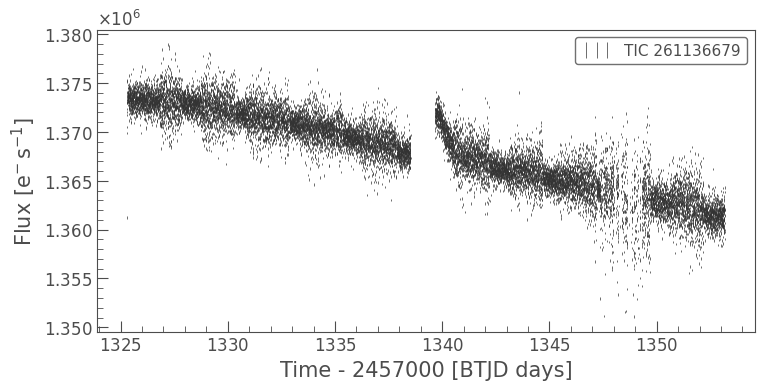

In [19]:
lc.errorbar();

This looks pretty good, but maybe we can improve things by creating a new aperture.

/home/chetan/.local/lib/python3.6/site-packages/lightkurve/utils.py:459: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(cax, ax=ax, norm=norm, label=clabel)


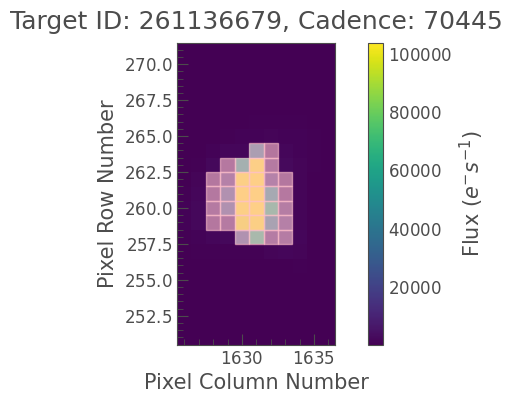

In [20]:
aperture_mask = tpf.create_threshold_mask(threshold=10)

# Plot that aperture
tpf.plot(aperture_mask=aperture_mask);

In [21]:
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)

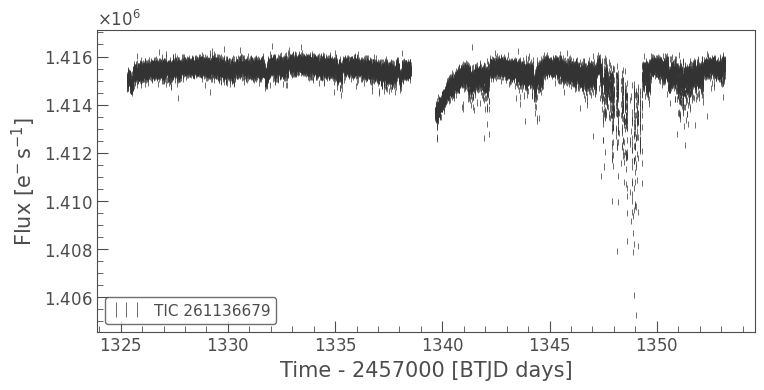

In [22]:
lc.errorbar();

There's a long term trend in this dataset, which we can remove with a simple smoothing filter. You can use the `lc.flatten()` method to apply and divide the [Savitzky-Golay smoothing filter](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter). Here we'll use a `window_length` of 1001 cadences, which is roughly a 5% of the full length of the light curve. 

In [23]:
# Number of cadences in the full light curve
print(lc.time.shape)

(18104,)


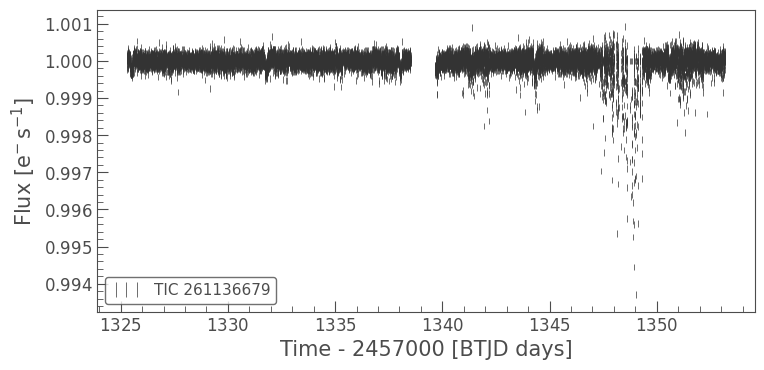

In [24]:
flat_lc = lc.flatten(window_length=1001)
flat_lc.errorbar();

The light curve looks much flatter. Unfortunately there is a portion of the light curve that is very noisy, due to a jitter in the TESS spacecraft. We can remove this simply by masking the light curve. First we'll select the times that had the jitter.

In [25]:
# Flag the times that are good quality
mask = (flat_lc.time < 1346) | (flat_lc.time > 1350)

Then we can just clip those times out.

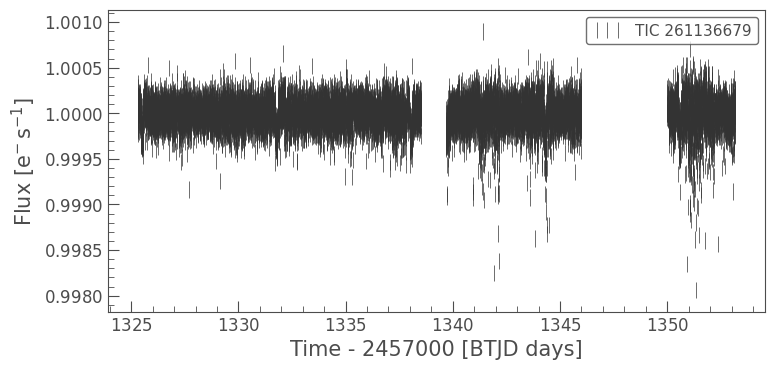

In [26]:
masked_lc = flat_lc[mask]
masked_lc.errorbar();

We can use *Lightkurve* to plot these two light curves over each other to see the difference. 

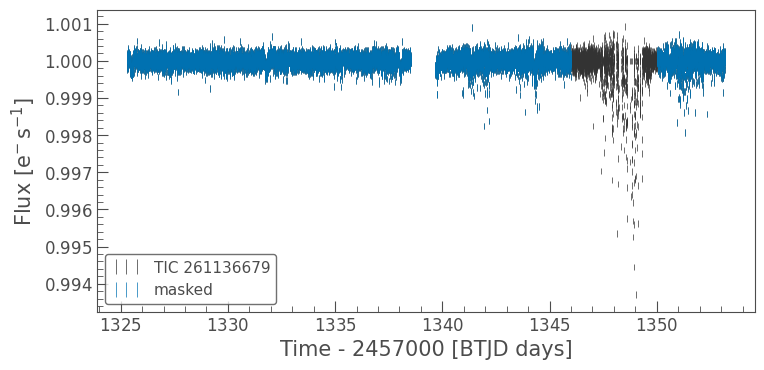

In [27]:
# First define the `matplotlib.pyplot.axes`
ax = flat_lc.errorbar()

# Pass that axis to the next plot
masked_lc.errorbar(ax=ax, label='masked');

This looks much better. Now we might want to clip out some outliers from the light curve. We can do that with a simple lightkurve function `remove_outliers()`

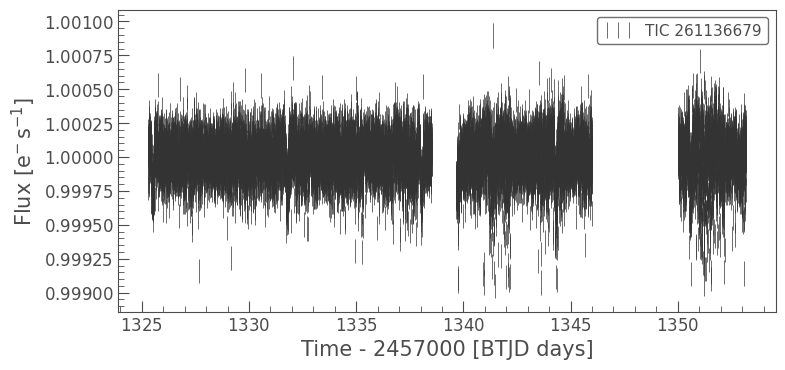

In [28]:
clipped_lc = masked_lc.remove_outliers(sigma=6)
clipped_lc.errorbar();

It's a little hard to see these data because of the plotting style. Let's use a scatter plot instead. We can do this with the `lc.scatter()` method. This method works in the same way that `matplotlib.pyplot.scatter` works, and takes in the same keyword arguments.

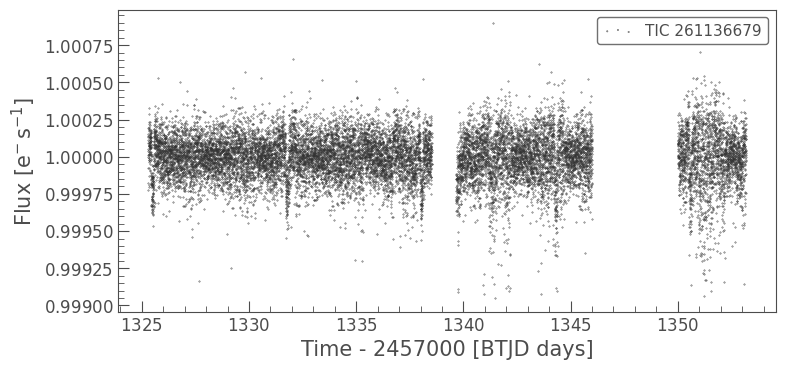

In [29]:
clipped_lc.scatter(s=0.1);

We can also add errorbars using the `lc.errorbar()` method.

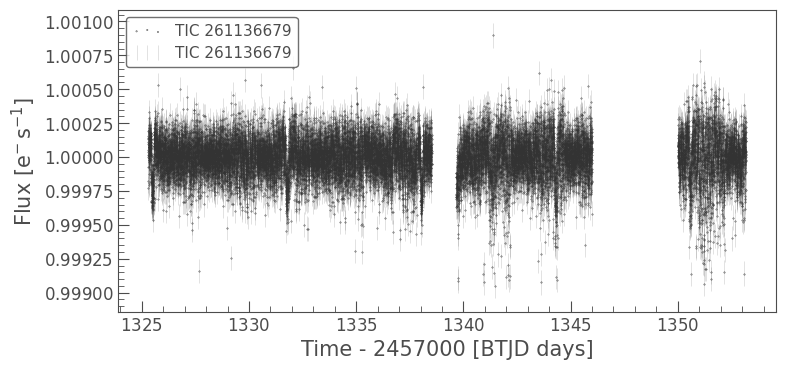

In [30]:
ax = clipped_lc.scatter(s=0.1)
clipped_lc.errorbar(ax=ax, alpha=0.2);  # alpha determines the transparency

Finally let's use `lightkurve` to fold the data at the exoplanet orbital period and see if we can see the transit.

In [31]:
?clipped_lc.fold

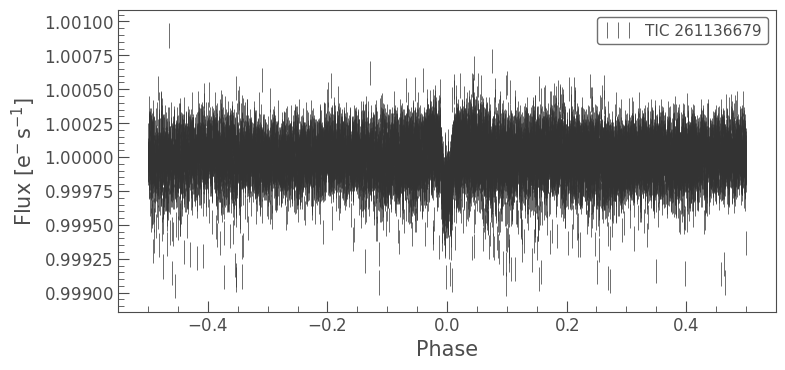

In [32]:
folded_lc = clipped_lc.fold(period=6.27, t0=1325.504) #epoch_time has been replaced by t0
folded_lc.errorbar();

It looks like there's something there, but it's hard to see. Let's bin the light curve to reduce the number of points, but also reduce the uncertainty of those points.

In [33]:
?folded_lc.bin

5.0


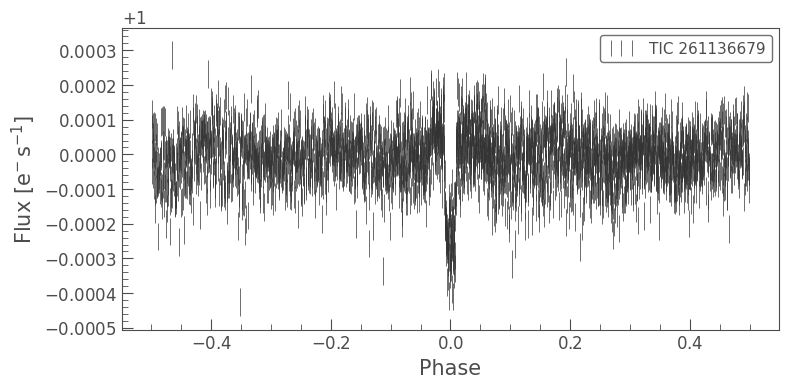

In [34]:
import astropy.units as u
# print(5*u.minute)
intt=5*u.minute
print(intt.value)
binned_lc = folded_lc.bin(binsize=int(intt.value))
binned_lc.errorbar();

And now we can see the transit of Pi Men c! 

Note that you can actually do all these steps in just a few lines:

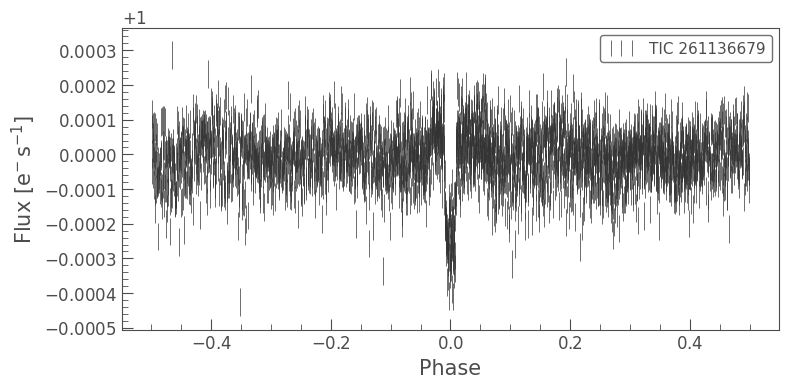

In [38]:
# Changes here
# removed .value post .time as the .time object gives the value of the time now
# Changed epoch_time to t0 as the same has been changed as per the documentation
# Changed the argument of bin function from time_bin_size to binsize(has been changed as per documentation)
  # also converted 5 minutes to return only value (5.0) and typecasted the same as an integer as the bin(binsize) only accepts ints 
lc = tpf.to_lightcurve(aperture_mask=aperture_mask).flatten(window_length=1001)
lc = lc[(lc.time < 1346) | (lc.time > 1350)]
lc.remove_outliers(sigma=6).fold(period=6.27, t0=1325.504).bin(binsize=int((5*u.minute).value)).errorbar();

## Comparing two apertures

In the above tutorial we used our own aperture instead of the pipeline aperture. Let's compare the results from using these two different apertures.

In [ ]:
# Use the default
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask).flatten(window_length=1001)
lc = lc[(lc.time < 1346) | (lc.time > 1350)].remove_outliers(6).fold(period=6.27, t0=1325.504).bin(binsize=int((5*u.minute).value))

# Use a custom aperture
custom_lc = tpf.to_lightcurve(aperture_mask=aperture_mask).flatten(window_length=1001)
custom_lc = custom_lc[(custom_lc.time < 1346) | (custom_lc.time > 1350)].remove_outliers(6).fold(period=6.27, t0=1325.504).bin(binsize=int((5*u.minute).value))

In [ ]:
ax = lc.errorbar(label='Default aperture')
custom_lc.errorbar(ax=ax, label='Custom aperture');

The importance of using different aperture masks is clearly visible in the figure above.  Note however that the data archive at MAST also contains lightcurve products which have more advanced systematics removal methods applied.  We will explore those in a future tutorial!

## Code is corrected now and is running successfully
